# Rejection sampling

Author: [Nipun Batra](https://nipunbatra.github.io/)

https://www.youtube.com/watch?v=kYWHfgkRc9s

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import expon
import seaborn as sns
%matplotlib inline

rc('font', size=16)
rc('text', usetex=True)

## Exponential distribution

Plotting pdf of exponential distribution

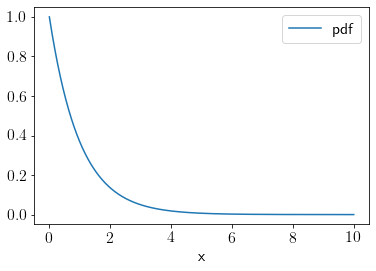

In [2]:
rv = expon()
x = np.linspace(0, 10, 1000)
plt.plot(x, rv.pdf(x), label='pdf');
plt.xlabel('x');
plt.legend();

Generating samples from uniform distribution

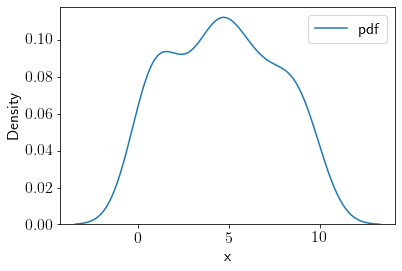

In [3]:
uni_samples = np.random.uniform(low=0, high=10, size=100)

sns.kdeplot(uni_samples, label='pdf');
plt.xlabel('x');
plt.legend();

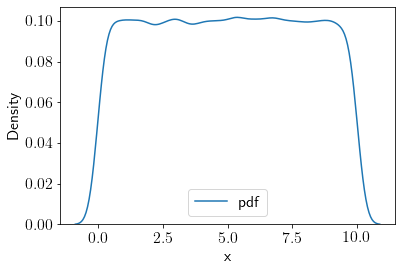

In [4]:
uni_samples = np.random.uniform(low=0, high=10, size=100000)

sns.kdeplot(uni_samples, label='pdf');
plt.xlabel('x');
plt.legend();

We can accept all the samples that fall within the area underneath pdf.

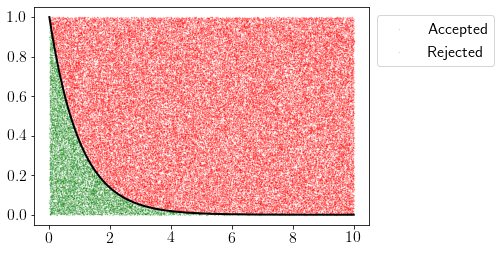

In [5]:
x = np.linspace(0, 10, 1000)
plt.plot(x, rv.pdf(x),'k',lw=2)

samples_uniform_x = np.random.uniform(0, 10, 100000)
samples_uniform_y = np.random.uniform(0, 1, 100000)


pdfs = rv.pdf(samples_uniform_x)

idx = samples_uniform_y < pdfs

plt.scatter(samples_uniform_x[idx], samples_uniform_y[idx],alpha=0.3, color='green',s=0.1,label="Accepted")
plt.scatter(samples_uniform_x[~idx], samples_uniform_y[~idx],alpha=0.3, color='red',s=0.1,label="Rejected")
plt.legend(bbox_to_anchor=(1,1));

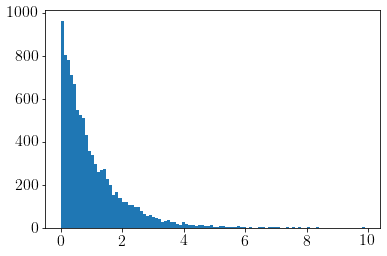

In [6]:
plt.hist(samples_uniform_x[idx], bins=100);

We can define a general function to do the rejection sampling.

In [7]:
def rejection_sampling(pdf, lower_support, upper_support, samples=1000, y_max = 1):
    #x = np.linspace(0, 10, 1000)
    #plt.plot(x, pdf(x),'k',lw=2)

    samples_uniform_x = np.random.uniform(lower_support, upper_support, samples)
    samples_uniform_y = np.random.uniform(0, y_max, samples)


    pdfs = pdf(samples_uniform_x)

    idx = samples_uniform_y < pdfs

    plt.scatter(samples_uniform_x[idx], samples_uniform_y[idx],alpha=0.6, color='green',s=0.1,label="Accepted")
    plt.scatter(samples_uniform_x[~idx], samples_uniform_y[~idx],alpha=0.6, color='red',s=0.1,label="Rejected")
    plt.title(f'mean = {samples_uniform_x[idx].mean()}')
    plt.legend()

## Normal distribution

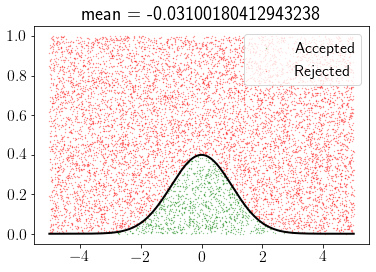

In [8]:
from scipy.stats import norm
scale =1
rv = norm(loc=0, scale=scale)
pdf = rv.pdf
rejection_sampling(pdf, -5, 5, 10000)
x = np.linspace(-5, 5, 1000)
plt.plot(x, pdf(x),'k',lw=2);

Let us try with lower value of standard deviation.

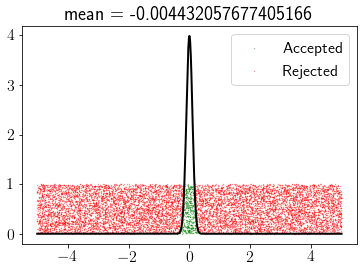

In [9]:
from scipy.stats import norm
scale =0.1
rv = norm(loc=0, scale=scale)
pdf = rv.pdf
rejection_sampling(pdf, -5, 5, 10000)
x = np.linspace(-5, 5, 1000)
plt.plot(x, pdf(x),'k',lw=2);

We need to increase the space of sampling in this case. 

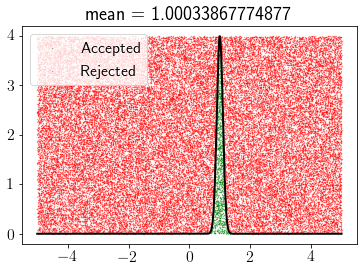

In [10]:
scale =0.1
rv = norm(loc=1, scale=scale)
pdf = rv.pdf
rejection_sampling(pdf, -5, 5, 50000,y_max=(1/scale)/(np.sqrt(2*np.pi)))
x = np.linspace(-5, 5, 1000)
plt.plot(x, pdf(x),'k',lw=2);

## Gamma distribution

In [11]:
from scipy.stats import gamma

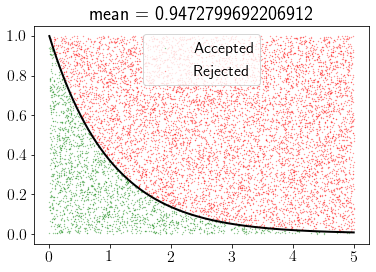

In [12]:
rv = gamma(1)
pdf = rv.pdf
rejection_sampling(pdf, 0, 5, 10000)
x = np.linspace(0, 5, 1000)
plt.plot(x, pdf(x),'k',lw=2);

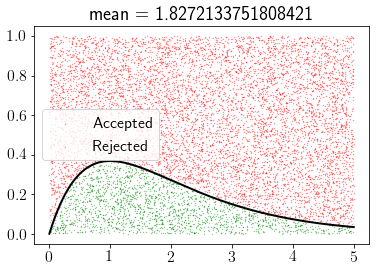

In [13]:
rv = gamma(2)
pdf = rv.pdf
rejection_sampling(pdf, 0, 5, 10000)
x = np.linspace(0, 5, 1000)
plt.plot(x, pdf(x),'k',lw=2);

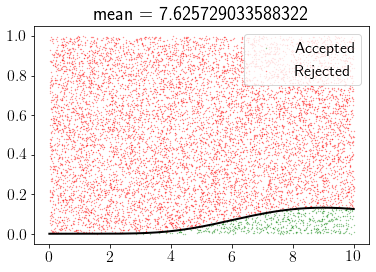

In [14]:
rv = gamma(10)
pdf = rv.pdf
rejection_sampling(pdf, 0, 10, 10000)
x = np.linspace(0, 10, 1000)
plt.plot(x, pdf(x),'k',lw=2);

## Beta distribution

In [15]:
from scipy.stats import beta

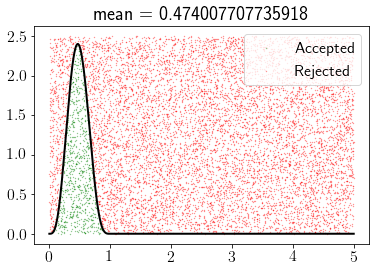

In [16]:
rv = beta(a=4.5, b=5)
pdf = rv.pdf
rejection_sampling(pdf, 0, 5, 10000, y_max=2.5)
x = np.linspace(0, 5, 1000)
plt.plot(x, pdf(x),'k',lw=2);